# Chatbot Satisfaction Data Analysis
This notebook contains exploratory data analysis (EDA) and correlation analysis for the chatbot satisfaction survey.
The analysis includes visualizations for all questions, demographic analysis, and correlations between variables.

### Step 1: Load and Clean the Dataset

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Cleaned_Chatbot_Satisfaction_Data.csv'
df = pd.read_csv(file_path)

# Clean the dataset by removing metadata rows
df_cleaned = df.drop([0, 1], axis=0)
df_cleaned.reset_index(drop=True, inplace=True)

# Remove unnecessary columns
columns_to_drop = ['StartDate', 'EndDate', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 
                   'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 
                   'RecipientEmail', 'LocationLatitude', 'LocationLongitude', 'LocationAccuracy', 'PROLIFIC_PID']
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Convert numeric columns where applicable
df_cleaned['age'] = pd.to_numeric(df_cleaned['age'], errors='coerce')
df_cleaned.head()
    

,Status,ExternalReference,DistributionChannel,UserLanguage,Q2,Q3,Q2.1,Q3.1,Q4,Q27,...,Q38.1,Q39.1,Q40.1,Q41.1,Q42.1,Q43.1,gender,gender_4_TEXT,age,nationality
0,IP Address,NaN,anonymous,EN-GB,Yes,6685935928a8784bdb54d2c7,Strongly agree,Somewhat agree,Somewhat agree,Neither satisfied nor dissatisfied,...,A lot,A little,A little,None at all,None at all,None at all,Male,NaN,26,Polish
1,IP Address,NaN,anonymous,EN-GB,Yes,5e805d349c1c2472d64b9a81,Strongly agree,Somewhat agree,Strongly agree,Neither satisfied nor dissatisfied,...,A lot,A moderate amount,A little,A lot,A moderate amount,A lot,Male,NaN,23,Poland
2,IP Address,NaN,anonymous,EN-GB,Yes,665c6fbeaf50f4046ca86d06,Strongly agree,Somewhat agree,Strongly agree,Extremely satisfied,...,A great deal,A great deal,A moderate amount,A great deal,A great deal,A lot,Female,NaN,24,south africa
3,IP Address,NaN,anonymous,EN-GB,Yes,603cb0231c38de9fe48fd4c4,Somewhat agree,Strongly agree,Somewhat agree,Extremely dissatisfied,...,A little,A little,A lot,A moderate amount,A little,A little,Male,NaN,23,English
4,IP Address,NaN,anonymous,EN-GB,Yes,6086ceb0ef970fcd977a1472,Strongly agree,Strongly agree,Somewhat agree,Neither satisfied nor dissatisfied,...,A great deal,A lot,A lot,A little,A little,A little,Male,NaN,25,portuguese


### Step 2: Visualize Responses for All Questions

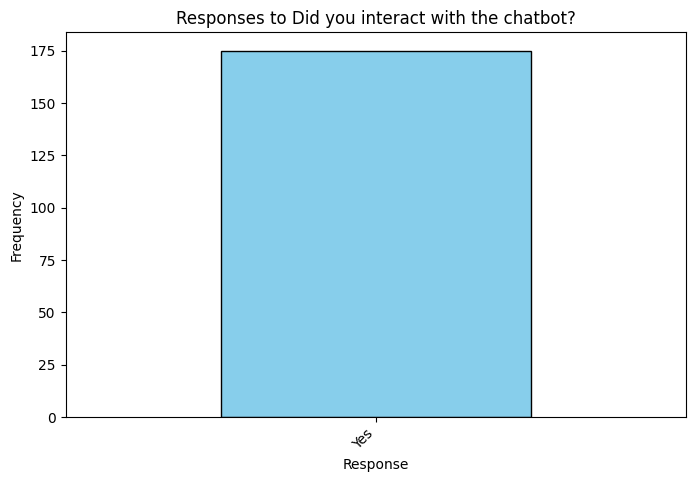

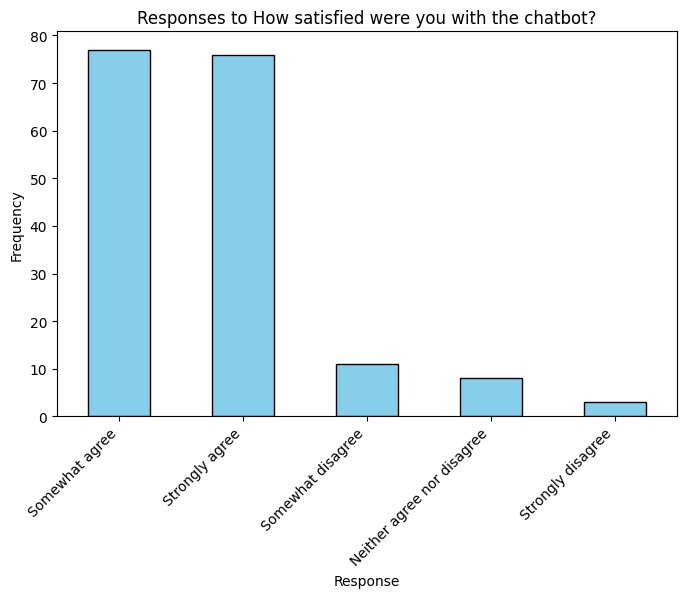

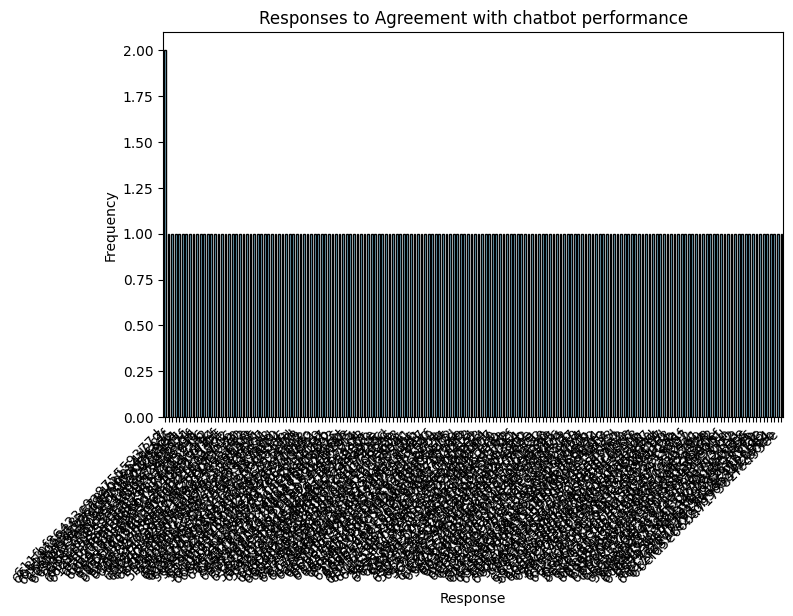

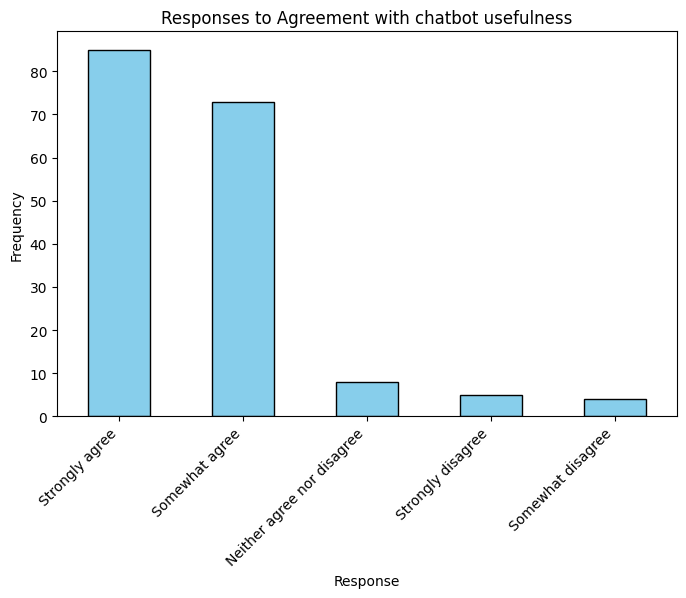

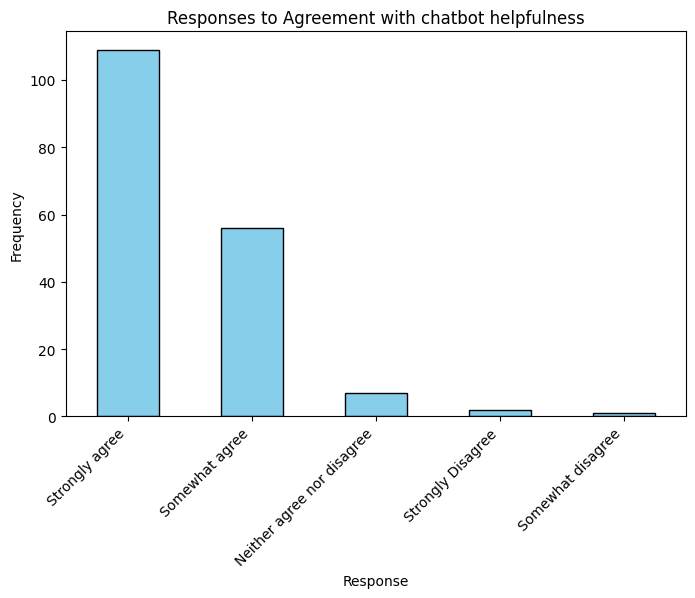

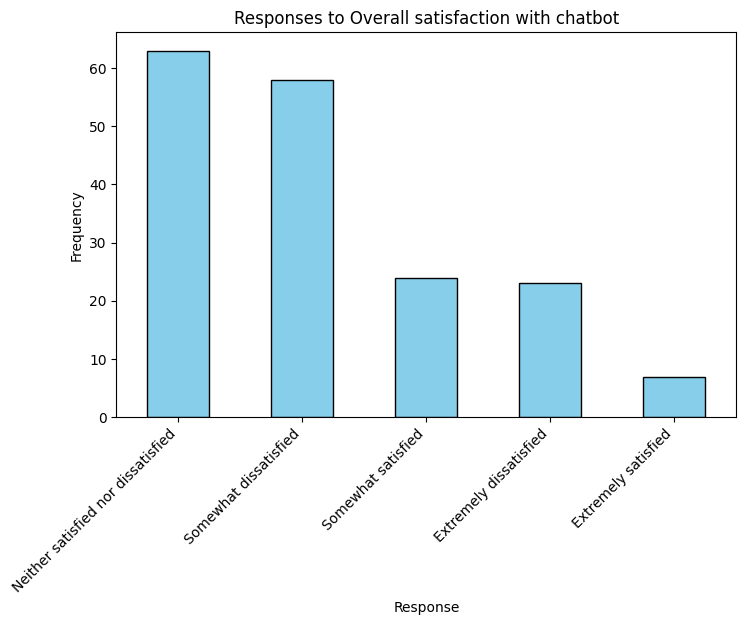

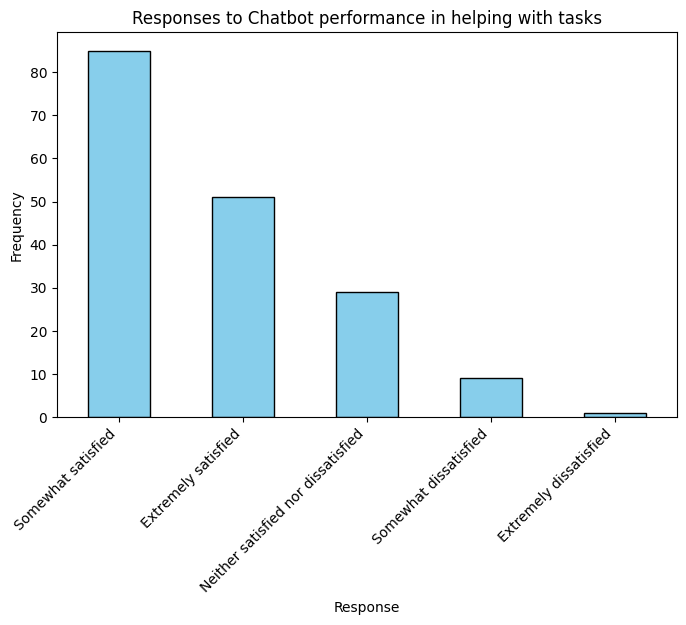

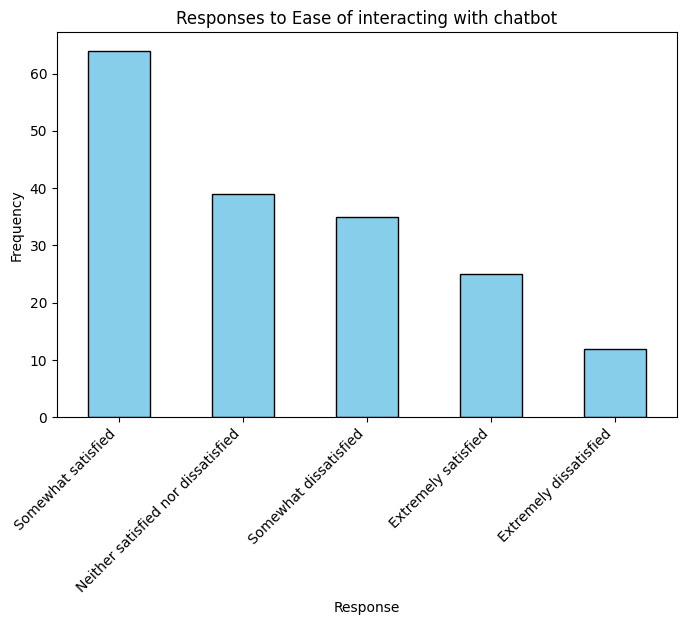

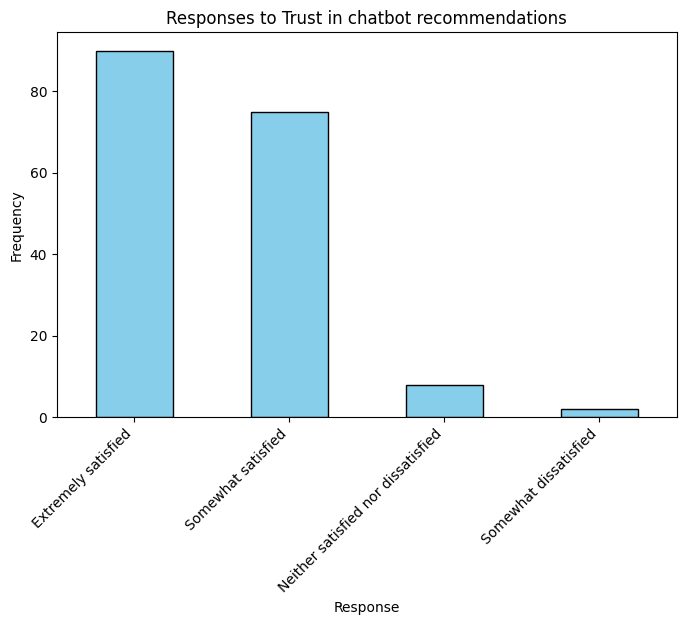

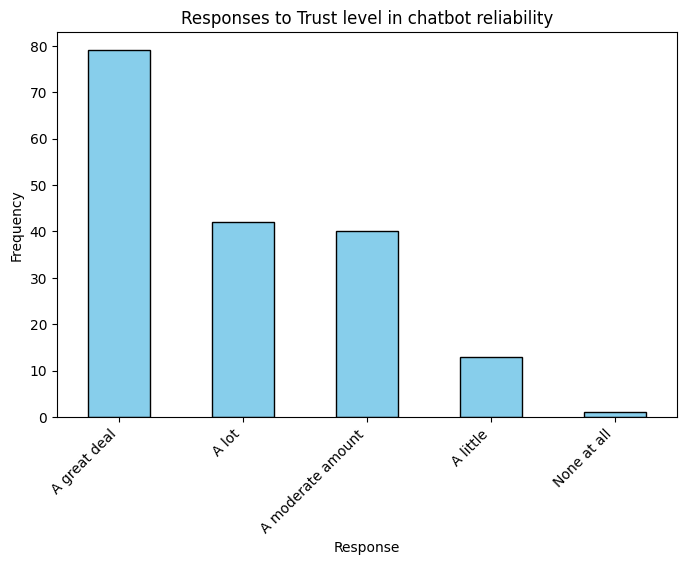

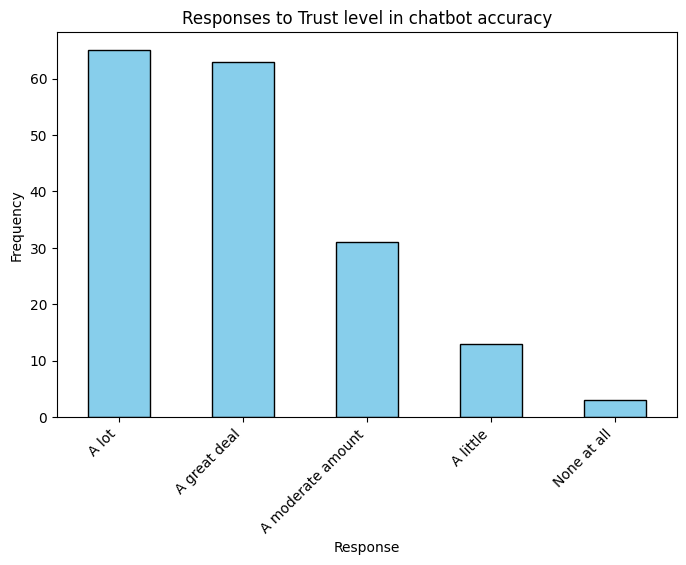

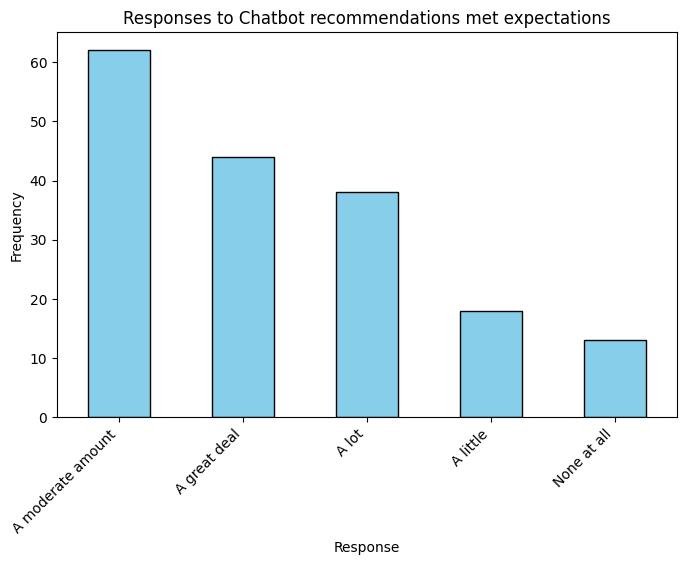

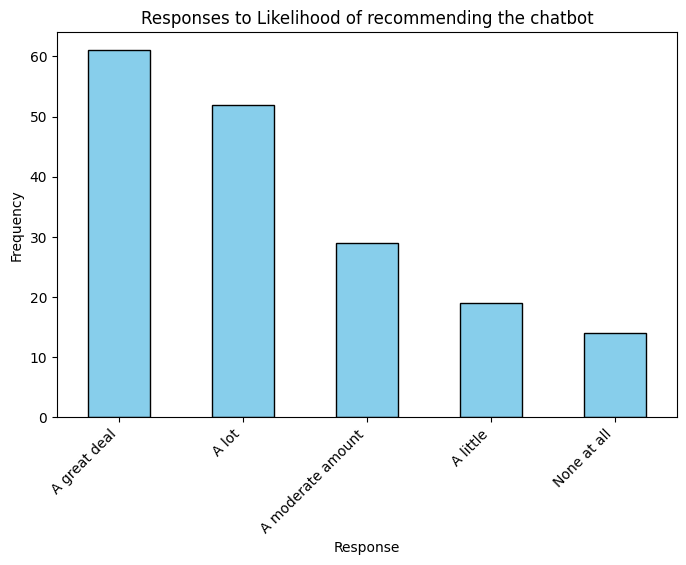

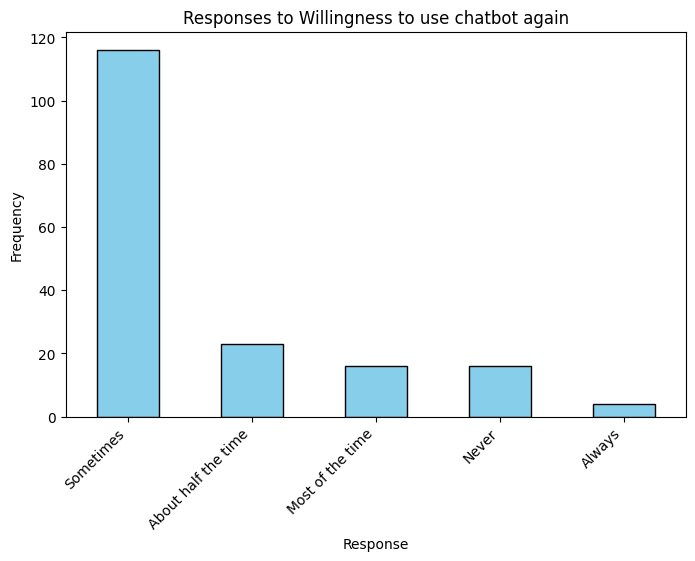

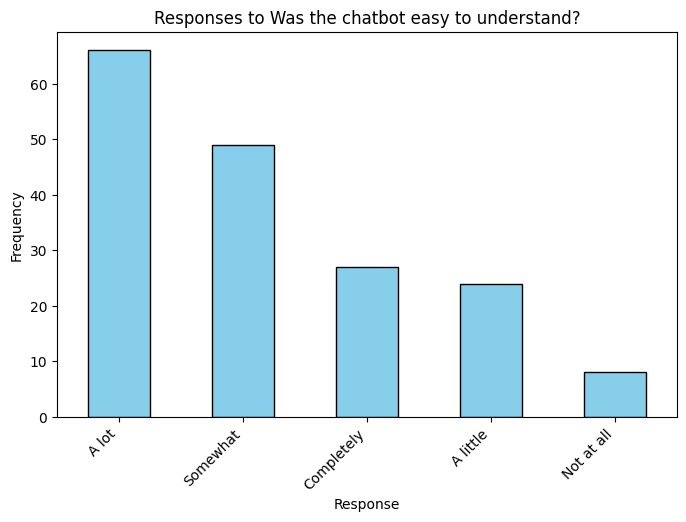

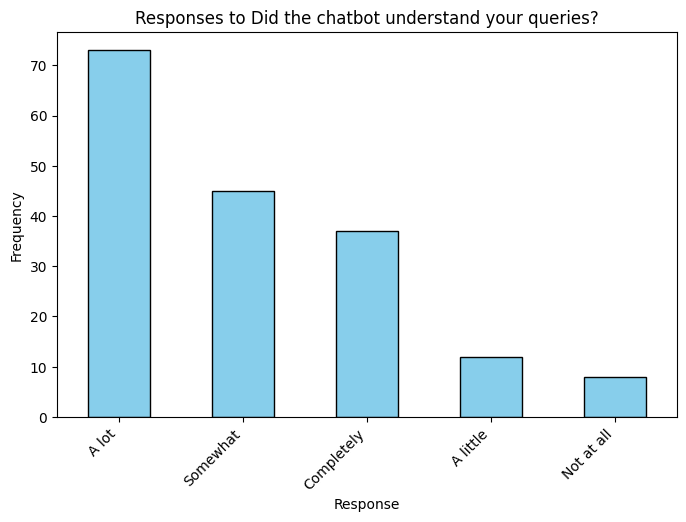

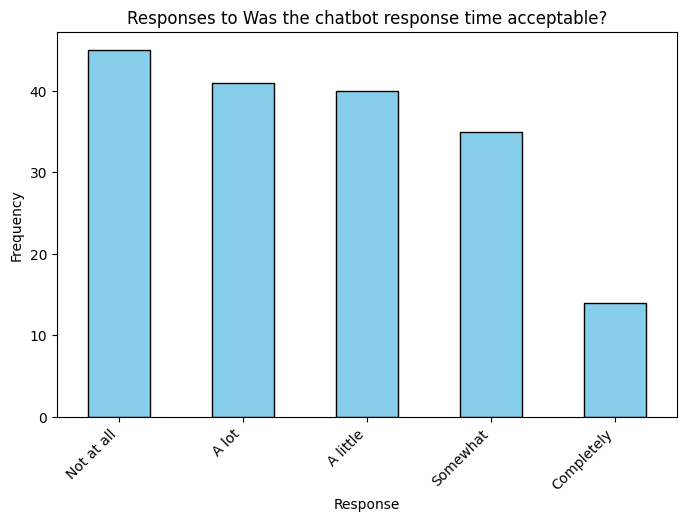

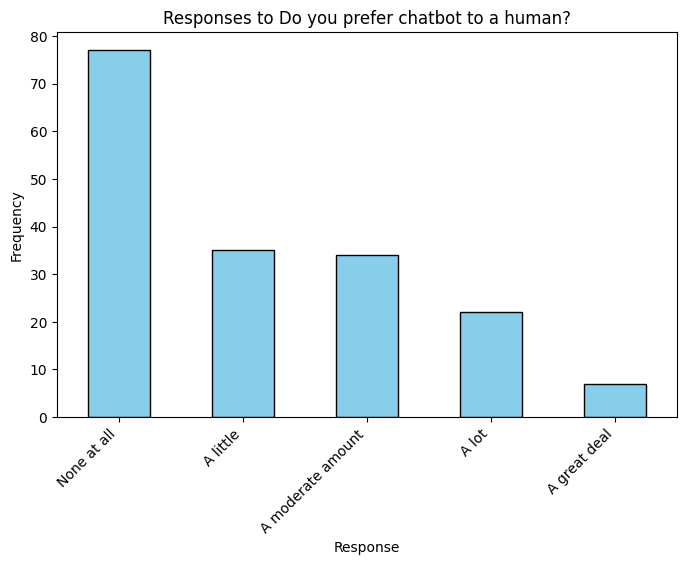

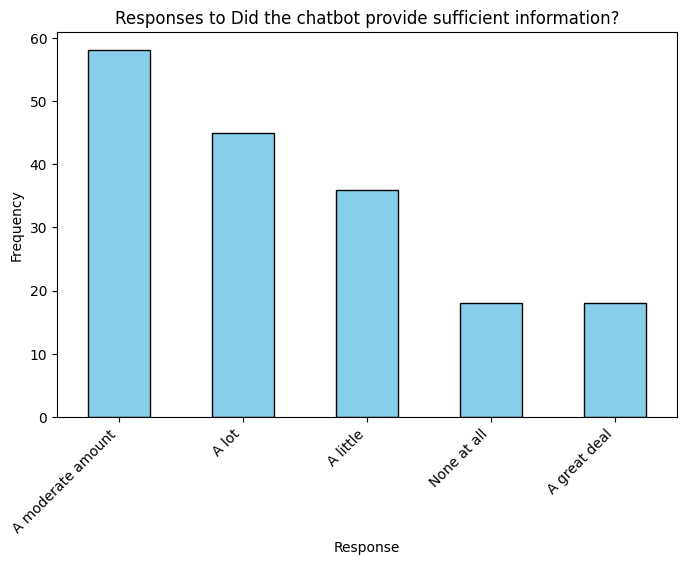

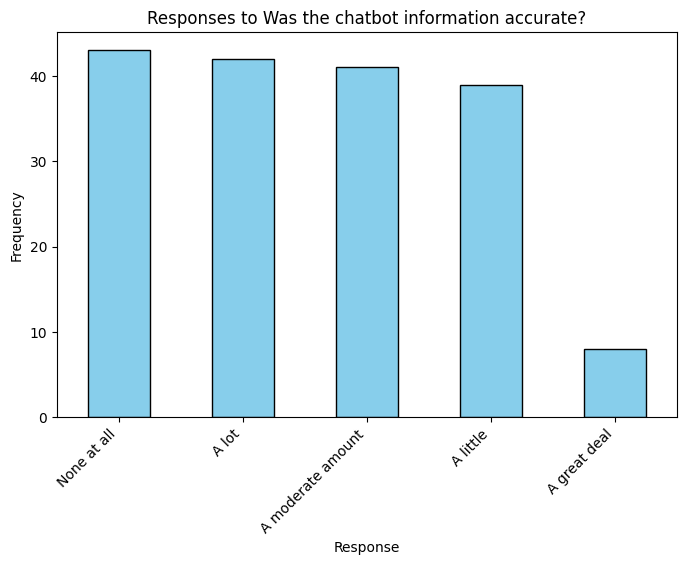

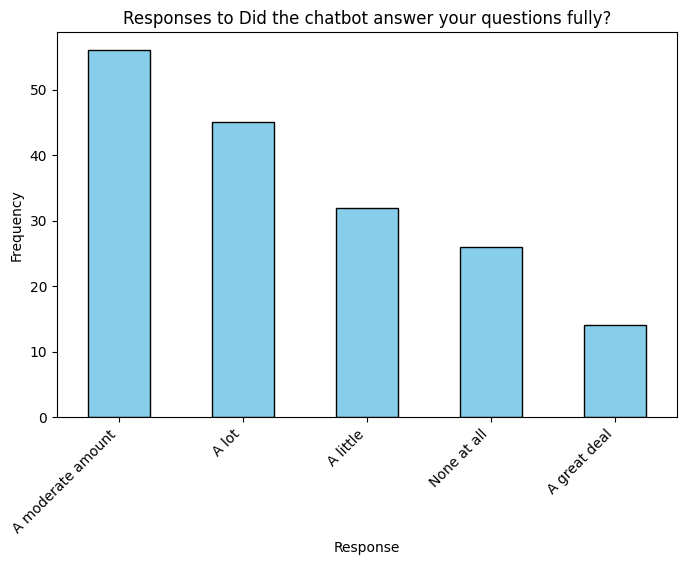

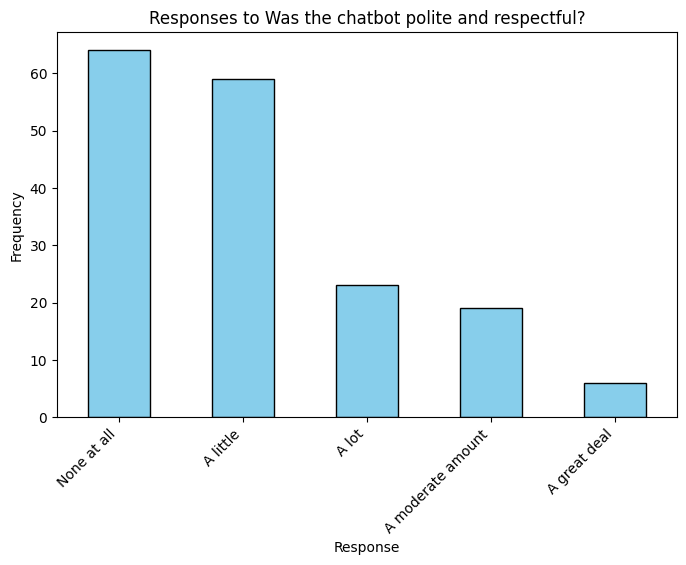

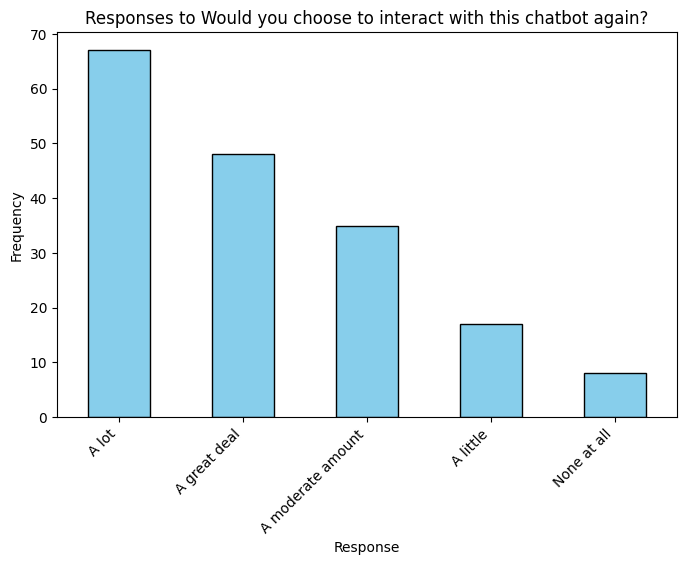

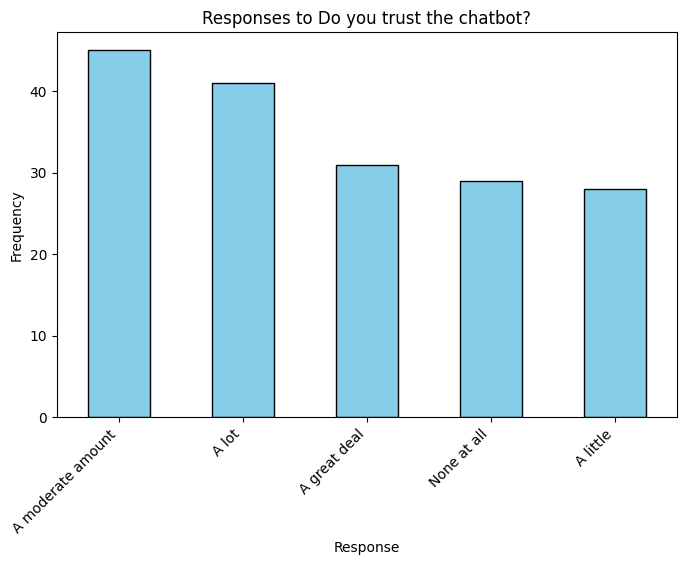

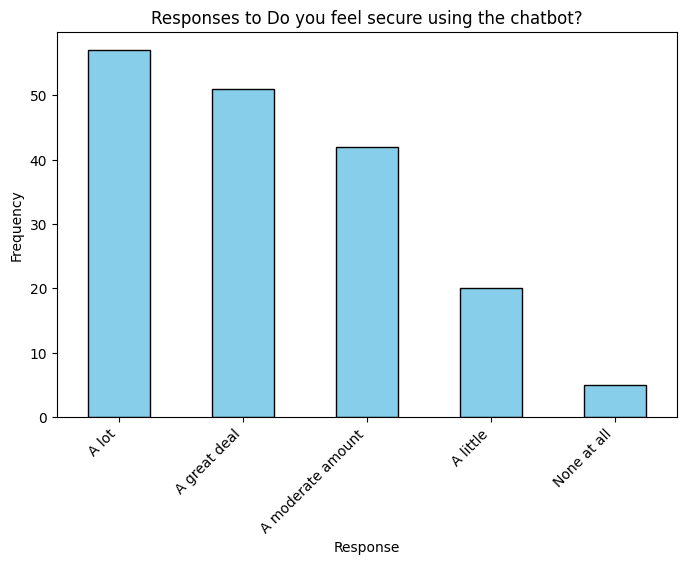

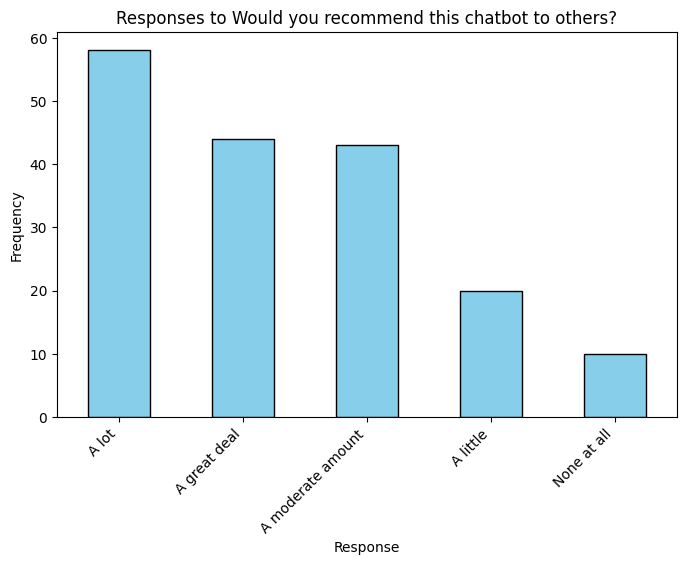

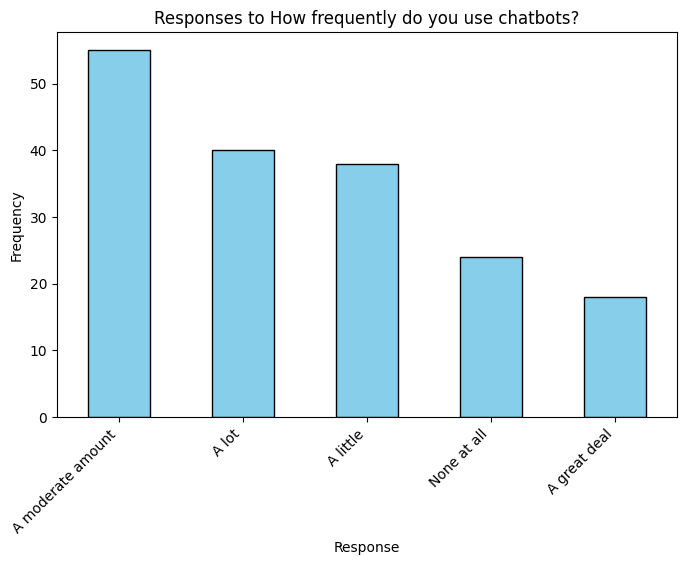

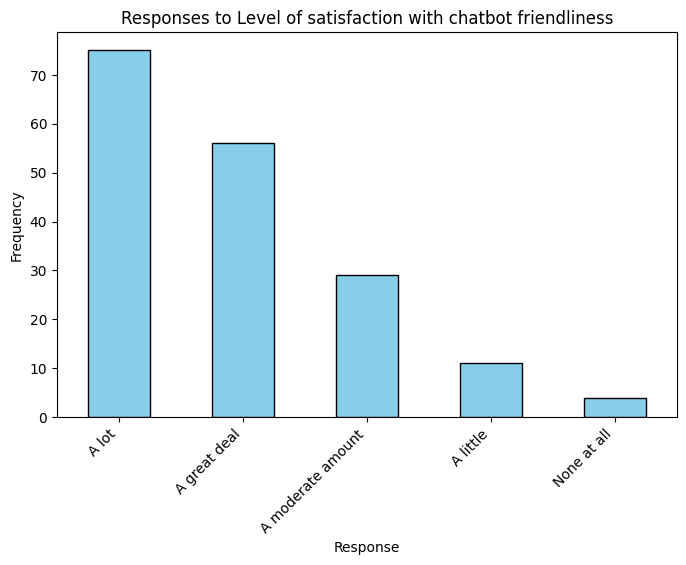

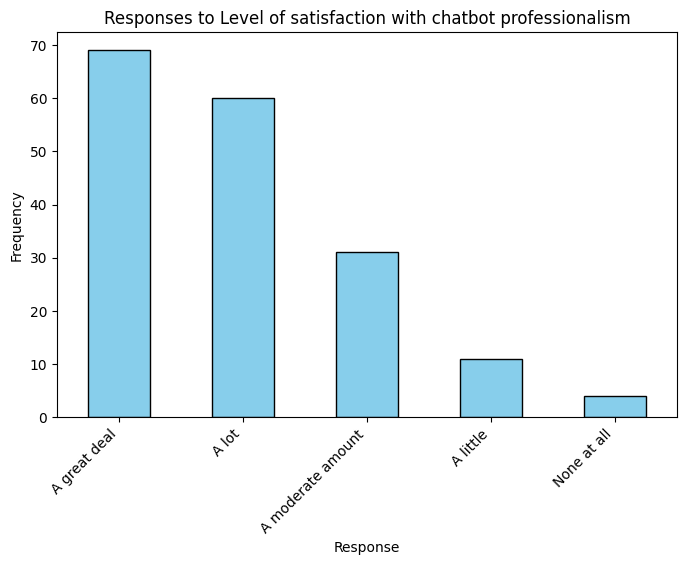

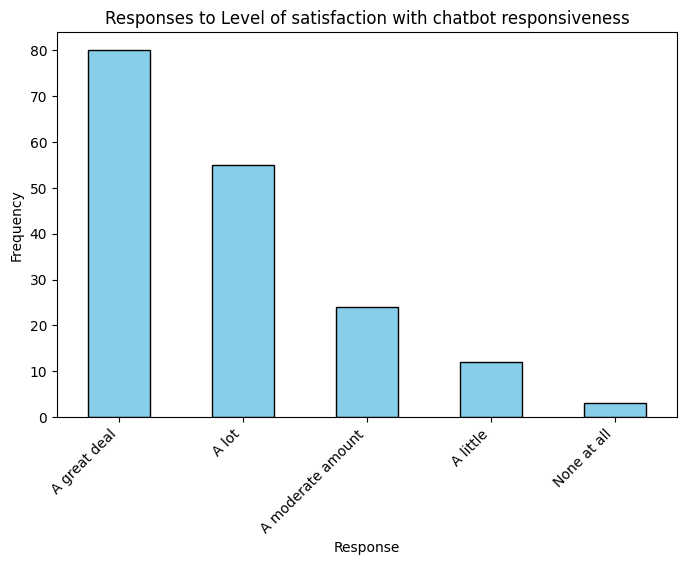

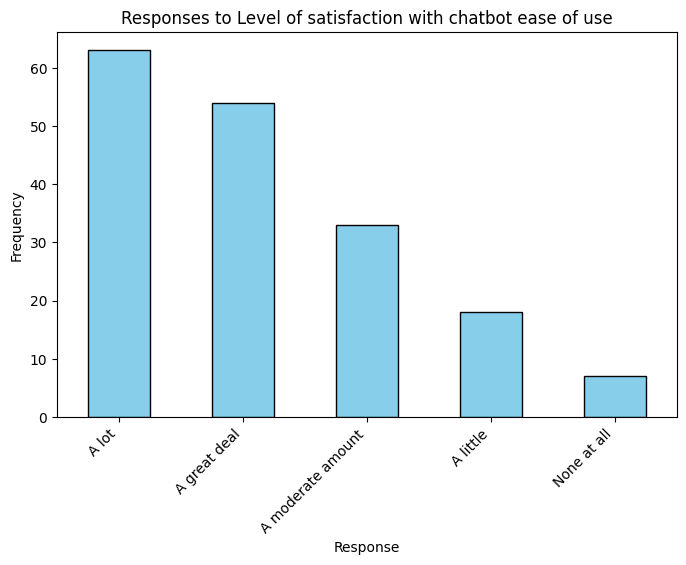

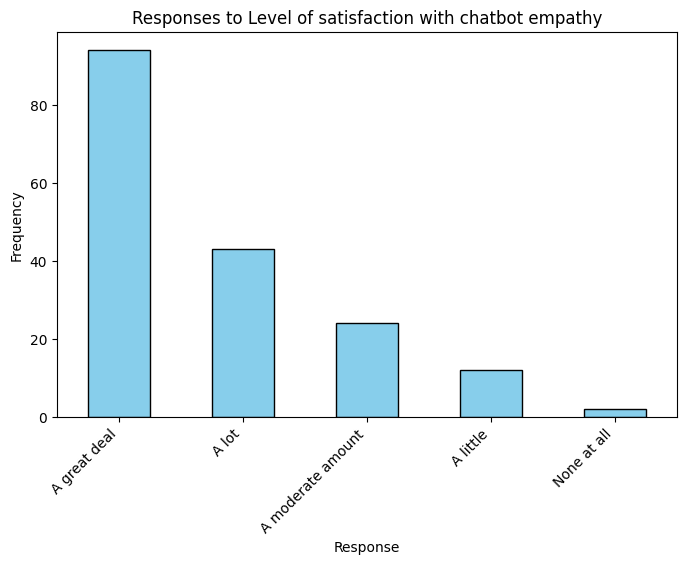

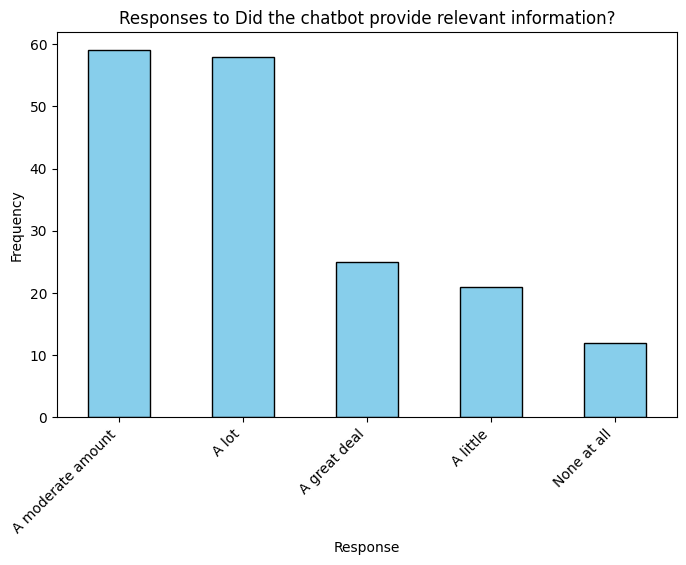

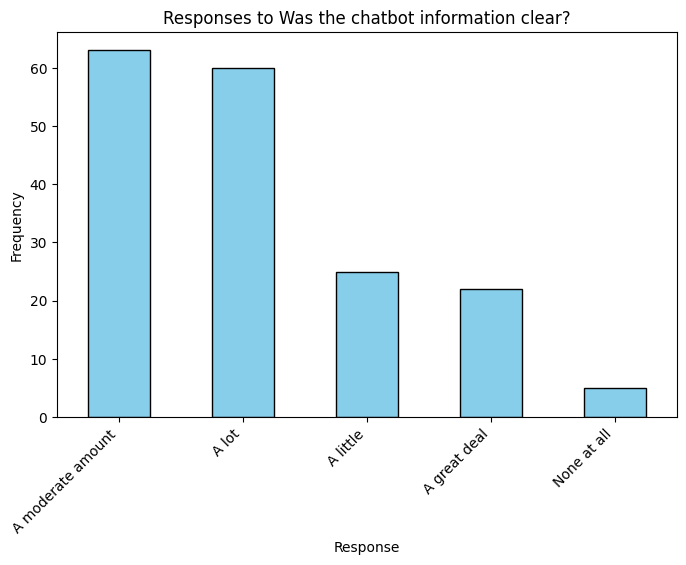

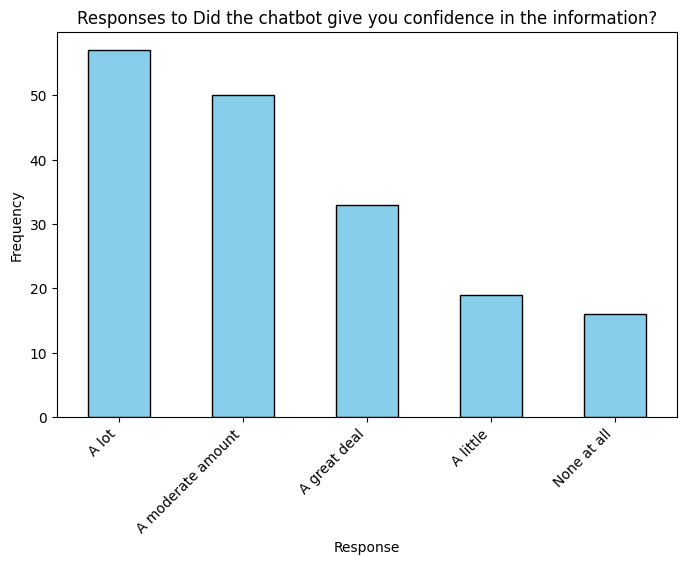

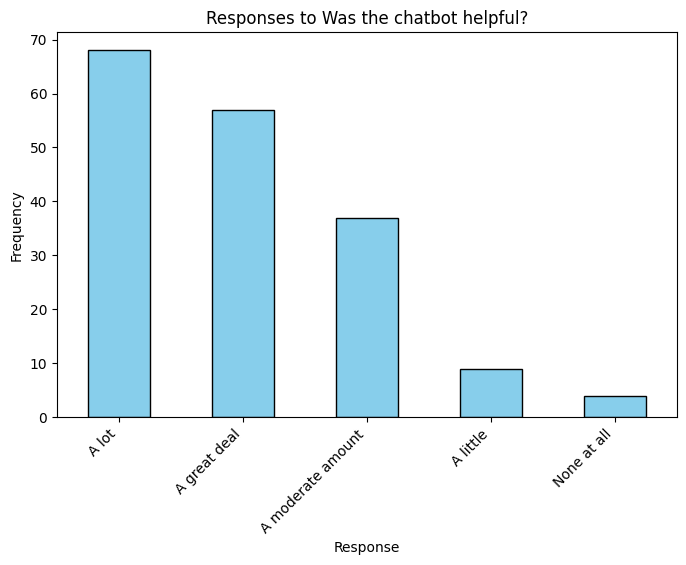

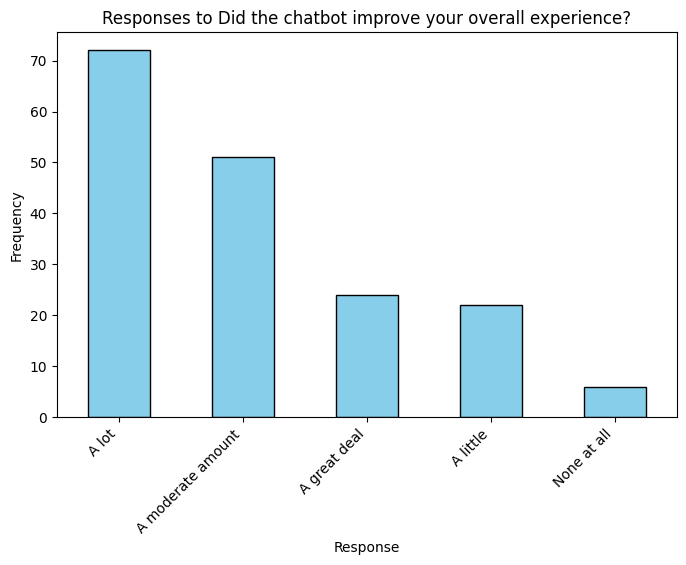

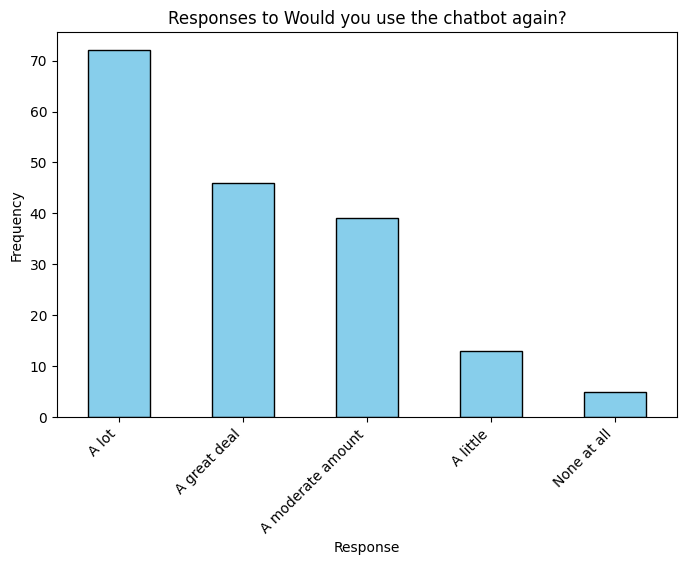

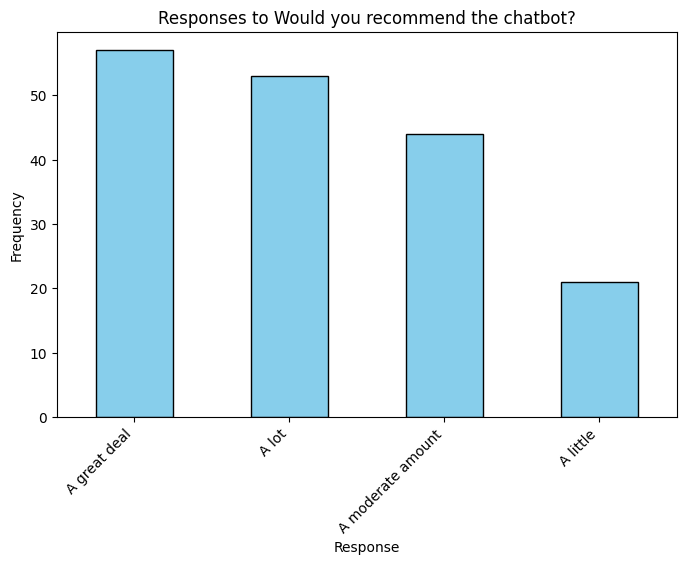

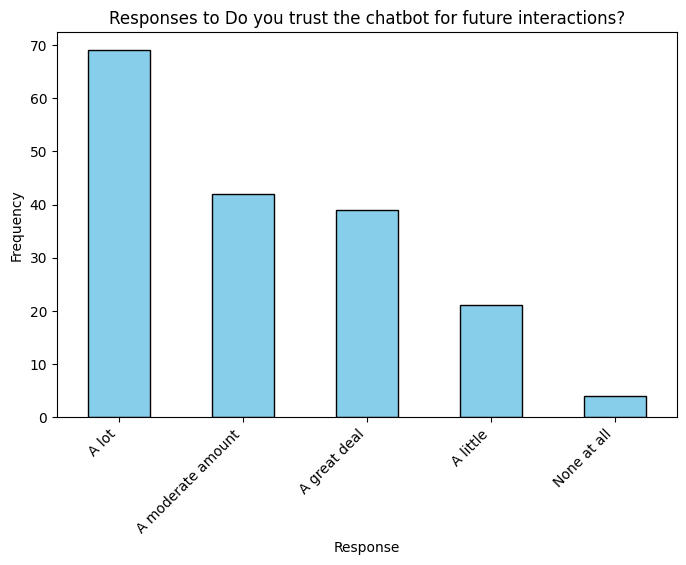

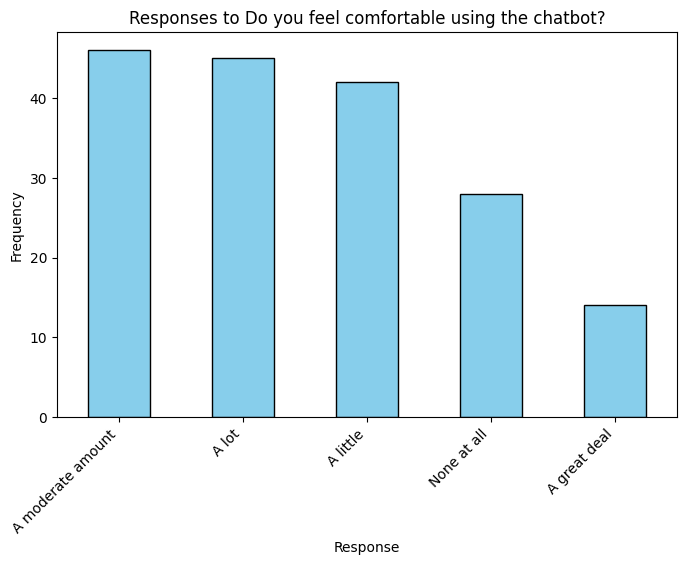

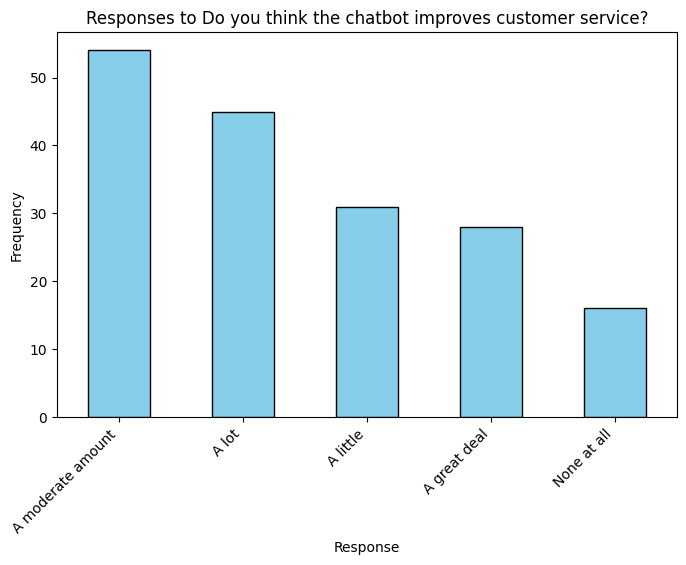

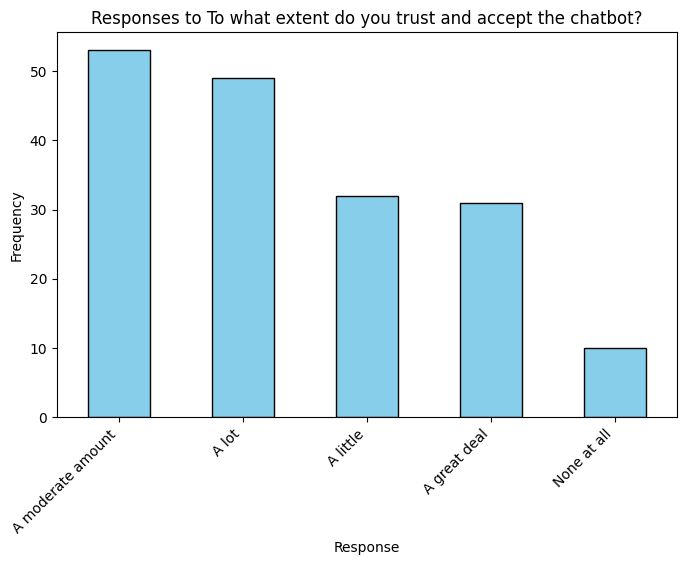

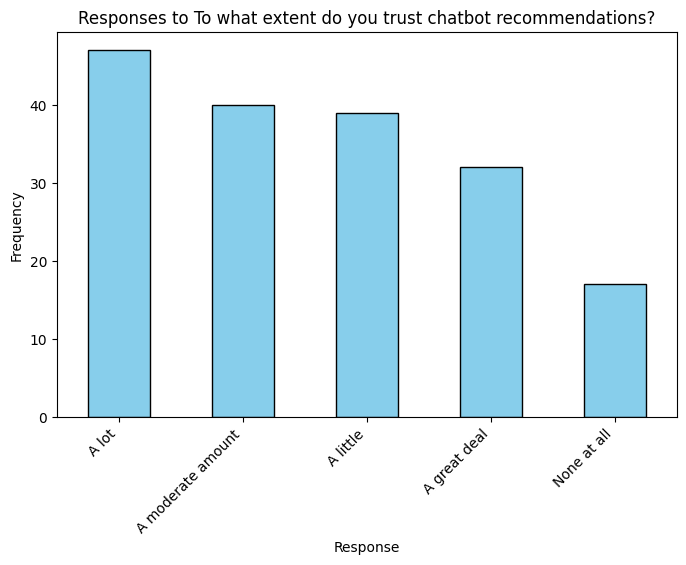

In [2]:

# List of questions for reference
questions_dict = {'Q2': 'Did you interact with the chatbot?', 'Q2.1': 'How satisfied were you with the chatbot?', 'Q3': 'Agreement with chatbot performance', 'Q3.1': 'Agreement with chatbot usefulness', 'Q4': 'Agreement with chatbot helpfulness', 'Q27': 'Overall satisfaction with chatbot', 'Q28': 'Chatbot performance in helping with tasks', 'Q29': 'Ease of interacting with chatbot', 'Q30': 'Trust in chatbot recommendations', 'Q42': 'Trust level in chatbot reliability', 'Q43': 'Trust level in chatbot accuracy', 'Q44': 'Chatbot recommendations met expectations', 'Q50': 'Likelihood of recommending the chatbot', 'Q45': 'Willingness to use chatbot again', 'Q13': 'Was the chatbot easy to understand?', 'Q14': 'Did the chatbot understand your queries?', 'Q15': 'Was the chatbot response time acceptable?', 'Q32': 'Do you prefer chatbot to a human?', 'Q33': 'Did the chatbot provide sufficient information?', 'Q34': 'Was the chatbot information accurate?', 'Q35': 'Did the chatbot answer your questions fully?', 'Q36': 'Was the chatbot polite and respectful?', 'Q46': 'Would you choose to interact with this chatbot again?', 'Q47': 'Do you trust the chatbot?', 'Q48': 'Do you feel secure using the chatbot?', 'Q49': 'Would you recommend this chatbot to others?', 'Q18': 'How frequently do you use chatbots?', 'Q37': 'Level of satisfaction with chatbot friendliness', 'Q38': 'Level of satisfaction with chatbot professionalism', 'Q39': 'Level of satisfaction with chatbot responsiveness', 'Q40': 'Level of satisfaction with chatbot ease of use', 'Q41': 'Level of satisfaction with chatbot empathy', 'Q32.1': 'Did the chatbot provide relevant information?', 'Q33.1': 'Was the chatbot information clear?', 'Q34.1': 'Did the chatbot give you confidence in the information?', 'Q35.1': 'Was the chatbot helpful?', 'Q36.1': 'Did the chatbot improve your overall experience?', 'Q37.1': 'Would you use the chatbot again?', 'Q38.1': 'Would you recommend the chatbot?', 'Q39.1': 'Do you trust the chatbot for future interactions?', 'Q40.1': 'Do you feel comfortable using the chatbot?', 'Q41.1': 'Do you think the chatbot improves customer service?', 'Q42.1': 'To what extent do you trust and accept the chatbot?', 'Q43.1': 'To what extent do you trust chatbot recommendations?'}

# List of columns to visualize (starting with questions)
question_columns = ['Q2', 'Q2.1', 'Q3', 'Q3.1', 'Q4', 'Q27', 'Q28', 'Q29', 'Q30', 'Q42', 'Q43', 'Q44', 'Q50', 'Q45', 'Q13', 'Q14', 'Q15', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q46', 'Q47', 'Q48', 'Q49', 'Q18', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q32.1', 'Q33.1', 'Q34.1', 'Q35.1', 'Q36.1', 'Q37.1', 'Q38.1', 'Q39.1', 'Q40.1', 'Q41.1', 'Q42.1', 'Q43.1']

# Loop through the question columns and plot each one
for col in question_columns:
    if col in df_cleaned.columns:
        plt.figure(figsize=(8, 5))
        df_cleaned[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Responses to {questions_dict[col]}')
        plt.xlabel('Response')
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.xticks(rotation=45, ha='right')
        plt.show()
    